In [50]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# evaluate bagging ensemble for regression
# ------------------------------------------------------------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold






# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [79]:
# Data Loading
# The Titanic dataset is available in Seaborn as the ‘titanic’ dataset. It consists of the following columns:

# Survived: Survival status (0 = No, 1 = Yes)
# Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
# Sex: Passenger’s gender
# Age: Passenger’s age
# SibSp: Number of siblings/spouses aboard
# Parch: Number of parents/children aboard
# Fare: Fare paid for the ticket
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
# Who: Passenger’s category (man, woman, child)
# Adult_male: Whether the passenger is an adult male or not (True or False)
# Deck: Cabin deck
# Embark_town: Port of embarkation (Cherbourg, Queenstown, Southampton)
# Alive: Survival status (yes or no)
# Alone: Whether the passenger is alone or not (True or False)
# Adult_male: Whether the passenger is an adult male or not (True or False)
# Alone: Whether the passenger is alone or not (True or False)
# Alive: Survival status (yes or no)
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

import seaborn as sns    
data_train = sns.load_dataset('titanic')
data_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
data_train= data_train.drop(columns = ["survived", "pclass", "embarked", "who", "adult_male", "deck"])

In [81]:
data_train=data_train.dropna()

In [82]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          712 non-null    object  
 1   age          712 non-null    float64 
 2   sibsp        712 non-null    int64   
 3   parch        712 non-null    int64   
 4   fare         712 non-null    float64 
 5   class        712 non-null    category
 6   embark_town  712 non-null    object  
 7   alive        712 non-null    object  
 8   alone        712 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(3)
memory usage: 46.0+ KB


In [83]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "alive"),
                                        data_train['alive'],
                                        train_size= 0.7, # by default 0.75 is the amunt of data for training
                                        random_state = 123
                                                            ) 

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 605 to 646
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          498 non-null    object  
 1   age          498 non-null    float64 
 2   sibsp        498 non-null    int64   
 3   parch        498 non-null    int64   
 4   fare         498 non-null    float64 
 5   class        498 non-null    category
 6   embark_town  498 non-null    object  
 7   alone        498 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 28.3+ KB


In [85]:
#Conversion of categorical values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Identification of categoric and numerical variables/column
cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()


In [86]:
# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Application of one-hot-encoding only to the categorical variables
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Once the object ColumnTransformer was created, using the method fit()
# the transforms are applied to the taining and test datasets
# using transform(). Both operations at the same time using fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

In [87]:
# Cheking NaN /null values
X_train.isnull().sum()*100/X_train.shape[0]

sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
embark_town    0.0
alone          0.0
dtype: float64

In [88]:
# Obtaining names of columns for creation of a dataframe
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([ encoded_cat, numeric_cols])

In [89]:
# Conversion to dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_female               498 non-null    float64
 1   sex_male                 498 non-null    float64
 2   class_First              498 non-null    float64
 3   class_Second             498 non-null    float64
 4   class_Third              498 non-null    float64
 5   embark_town_Cherbourg    498 non-null    float64
 6   embark_town_Queenstown   498 non-null    float64
 7   embark_town_Southampton  498 non-null    float64
 8   alone_False              498 non-null    float64
 9   alone_True               498 non-null    float64
 10  age                      498 non-null    float64
 11  sibsp                    498 non-null    float64
 12  parch                    498 non-null    float64
 13  fare                     498 non-null    float64
dtypes: float64(14)
memory usag

In [90]:
X_train_prep

,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True,age,sibsp,parch,fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,36.0,1.0,0.0,15.5500
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,42.0,0.0,1.0,8.4042
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,0.0,0.0,10.5000
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,48.0,1.0,0.0,76.7292
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22.0,0.0,1.0,55.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,12.0,1.0,0.0,11.2417
494,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,8.0500
495,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,5.0,2.0,46.9000
496,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,65.0,0.0,0.0,26.5500


In [91]:
# Removing repeated column
X_train_prep= X_train_prep.drop(columns = ["sex_male"])
X_test_prep= X_test_prep.drop(columns = ["sex_male"])

# updatig coulmns names
labels= X_train_prep.columns.values

In [92]:
X_train_prep

,sex_female,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True,age,sibsp,parch,fare
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,36.0,1.0,0.0,15.5500
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,42.0,0.0,1.0,8.4042
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,0.0,0.0,10.5000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,48.0,1.0,0.0,76.7292
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22.0,0.0,1.0,55.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,12.0,1.0,0.0,11.2417
494,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,8.0500
495,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,5.0,2.0,46.9000
496,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,65.0,0.0,0.0,26.5500


Optimum value of max_features: 7


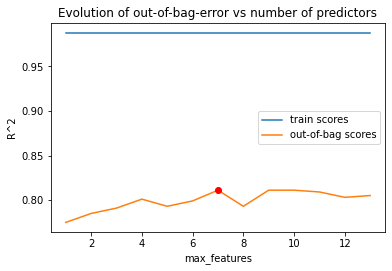

In [93]:
# Defining number of features to use based on Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train_prep.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestClassifier(
                n_estimators = 100,
                criterion    = 'entropy',  # or 'gini'
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model.fit(X_train_prep, y_train)
    train_scores.append(model.score(X_train_prep, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolution of out-of-bag-error vs number of predictors")
plt.legend();
print(f"Optimum value of max_features: {max_features_range[np.argmax(oob_scores)]}")

Optimum value of number of trees: 116


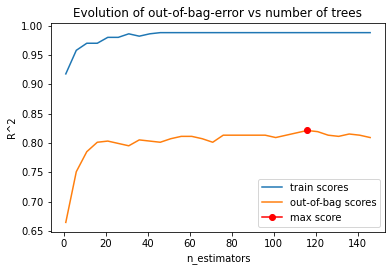

In [94]:
# Once  the number of estimators is know, the number of trees is found using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for n_estimators in estimator_range:
    model1 = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 7,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model1.fit(X_train_prep, y_train)
    train_scores.append(model1.score(X_train_prep, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of out-of-bag-error vs number of trees")
plt.legend();
print(f"Optimum value of number of trees: {estimator_range[np.argmax(oob_scores)]}")

Optimum value of minimum number of observations in leaves : 1


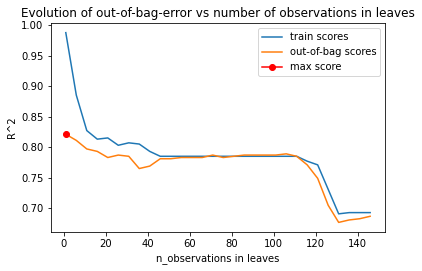

In [95]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model1 = RandomForestClassifier(
                n_estimators = 116,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 7,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model1.fit(X_train_prep, y_train)
    train_scores.append(model1.score(X_train_prep, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(obser_range, train_scores, label="train scores")
ax.plot(obser_range, oob_scores, label="out-of-bag scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_observations in leaves")
ax.set_title("Evolution of out-of-bag-error vs number of observations in leaves")
plt.legend();
print(f"Optimum value of minimum number of observations in leaves : {obser_range[np.argmax(oob_scores)]}")

In [96]:
# Model creation
# ==============================================================================
rf_final = RandomForestClassifier(
            n_estimators = 116,  # number of trees
            criterion    = 'entropy',
            max_depth    = None,
            #max_features = 'auto',
            max_features = 7,
            min_samples_leaf = 1,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
rf_final.fit(X_train_prep, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, n_estimators=116,
                       n_jobs=-1, oob_score=True, random_state=123)

In [97]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = rf_final.predict(X = X_train_prep,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[298,   1],
       [  5, 194]], dtype=int64)

In [98]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 98.80 %


In [99]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = rf_final.predict(X = X_test_prep,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[111,  14],
       [ 27,  62]], dtype=int64)

In [100]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 80.84 %


In [101]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train_prep.columns,
                             'importance': rf_final.feature_importances_}
                            )
print("Importance  of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance  of the model predictors
-------------------------------------------


,predictor,importance
9,age,0.313205
12,fare,0.237129
0,sex_female,0.227238
3,class_Third,0.063350
10,sibsp,0.044297
11,parch,0.025523
1,class_First,0.025298
2,class_Second,0.014165
4,embark_town_Cherbourg,0.013943
6,embark_town_Southampton,0.013432


In [102]:
# Grid to find hiperparameters
# ==============================================================================


from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [50, 100, 150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    model.fit(X_train_prep, y_train)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)
    print(f"Model: {params} \u2713")

# Results
# ==============================================================================
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓
Model: {'criterion':

,oob_accuracy,criterion,max_depth,max_features,n_estimators
60,0.841365,entropy,10.0,9,50
22,0.831325,gini,10.0,7,100
61,0.831325,entropy,10.0,9,100
55,0.831325,entropy,10.0,5,100
62,0.829317,entropy,10.0,9,150
23,0.827309,gini,10.0,7,150
56,0.827309,entropy,10.0,5,150
54,0.827309,entropy,10.0,5,50
59,0.827309,entropy,10.0,7,150
58,0.827309,entropy,10.0,7,100


In [103]:
# Better hyperparameters using out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Better hyperparameters found (oob-accuracy)")
print("--------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Better hyperparameters found (oob-accuracy)
--------------------------------------------------
0.8413654618473896 : 0.8413654618473896 accuracy


In [104]:
# Grid search based on cross-validation
# ==============================================================================
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# grid search by CV
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_prep, y = y_train)

# Resultados
# ==============================================================================
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
75,entropy,10,5,100,0.829259,0.030711,0.960341,0.005816
74,entropy,10,5,50,0.827239,0.030424,0.956323,0.006077
79,entropy,10,7,100,0.825226,0.036412,0.961344,0.006727
83,entropy,10,9,100,0.824586,0.033193,0.961344,0.006913


In [105]:
# Better hyperparameters using cv and out-of-bag error
# ==============================================================================
print("----------------------------------------")
print("Better hyperparameters found (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Better hyperparameters found (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'n_estimators': 100} : 0.8292592592592593 accuracy


In [106]:
model_final = grid.best_estimator_

In [107]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model_final.predict(X = X_train_prep,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[297,   2],
       [ 20, 179]], dtype=int64)

In [108]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 95.58 %


In [109]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model_final.predict(X = X_test_prep,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[114,  11],
       [ 26,  63]], dtype=int64)

In [110]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 82.71 %


In [111]:
mat_conf = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predictions_test
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )

print("Confissio Matrix")
print("-------------------")
print(mat_conf)
print("")
print(f"Accuracy in test is: {100 * accuracy} %")

Confissio Matrix
-------------------
[[114  11]
 [ 26  63]]

Accuracy in test is: 82.71028037383178 %


In [112]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_test
    )
)

              precision    recall  f1-score   support

          no       0.81      0.91      0.86       125
         yes       0.85      0.71      0.77        89

    accuracy                           0.83       214
   macro avg       0.83      0.81      0.82       214
weighted avg       0.83      0.83      0.82       214



In [113]:
# Prediction of probabilities
# ==============================================================================
predictions = model_final.predict_proba(X = X_test_prep)
predictions[:10, :]

array([[0.35589858, 0.64410142],
       [0.94365592, 0.05634408],
       [0.        , 1.        ],
       [0.21379292, 0.78620708],
       [0.58551256, 0.41448744],
       [0.20116667, 0.79883333],
       [0.73464385, 0.26535615],
       [0.235     , 0.765     ],
       [0.4748426 , 0.5251574 ],
       [0.71201786, 0.28798214]])

In [114]:
# Classification using the clas with higher probability
# ==============================================================================
df_predictions = pd.DataFrame(data=predictions, columns=['0', '1'])
df_predictions['classification_default_0.5'] = np.where(df_predictions['0'] > df_predictions['1'], 0, 1)
df_predictions.head(10)

,0,1,classification_default_0.5
0,0.355899,0.644101,1
1,0.943656,0.056344,0
2,0.000000,1.000000,1
3,0.213793,0.786207,1
4,0.585513,0.414487,0
5,0.201167,0.798833,1
6,0.734644,0.265356,0
7,0.235000,0.765000,1
8,0.474843,0.525157,1
9,0.712018,0.287982,0


In [115]:
# Classification using a threshold of 0.8 for class 1.
# ==============================================================================
df_predictions['classification_custom_0.8'] = np.where(df_predictions['1'] > 0.9, 1, 0)
df_predictions.iloc[4:20, :]

,0,1,classification_default_0.5,classification_custom_0.8
4,0.585513,0.414487,0,0
5,0.201167,0.798833,1,0
6,0.734644,0.265356,0,0
7,0.235000,0.765000,1,0
8,0.474843,0.525157,1,0
9,0.712018,0.287982,0,0
10,0.936592,0.063408,0,0
11,0.740000,0.260000,0,0
12,0.842863,0.157137,0,0
13,0.730060,0.269940,0,0


In [116]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train_prep.columns,
                             'importance': model_final.feature_importances_}
                            )
print("Importance  of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance  of the model predictors
-------------------------------------------


,predictor,importance
9,age,0.272092
0,sex_female,0.256438
12,fare,0.226319
3,class_Third,0.061585
10,sibsp,0.047114
11,parch,0.031719
1,class_First,0.030249
2,class_Second,0.020114
6,embark_town_Southampton,0.014758
4,embark_town_Cherbourg,0.013796


In [36]:
#h_train=np.where(y_train != "yes", 0, 1)